In [8]:
import numpy as np                  # type: ignore
import pandas as pd                 # type: ignore
import matplotlib.pyplot as plt     # type: ignore

data = pd.read_csv("ex1data1.txt", header=None, names=['Population', 'Profit'])   # name=  to put col names

print('data = \n', data.head(10))
print('**************************************')
print('data.shape = ', data.shape)
print('**************************************')
print('data.describe = \n', data.describe())

data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
**************************************
data.shape =  (97, 2)
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


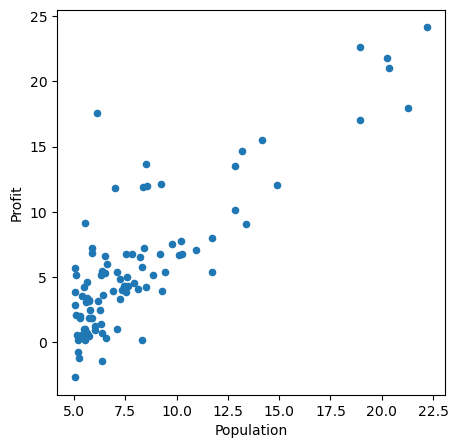

In [9]:
data.plot(x='Population', y='Profit', kind='scatter', figsize=(5,5))
plt.show()

In [10]:
print('data.shape = ', data.shape)
print('**************************************')
data.insert(0, 'Ones', 1)    # insert(col_index,col_name,col_value)
print('new data = \n' ,data.head(10))
print('**************************************')
print('data.shape = ', data.shape)

data.shape =  (97, 2)
**************************************
new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
**************************************
data.shape =  (97, 3)


In [11]:
# separate X (training data) from y (target variable) >>
cols = data.shape[1]
X = data.iloc[: , 0:cols-1]
y = data.iloc[: , cols-1:]

print('X data = \n' ,X.head(10) ,'\n')
print('y data = \n' ,y.head(10) )

X data = 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546 

y data = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


> ### convert from data frames to numpy matrices >>

In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
print('X :\n',X)
print('X.shape = ' , X.shape,'\n')
print('theta :\n',theta)
print('theta.shape = ' , theta.shape,'\n')
print('y :\n',y)
print('y.shape = ' , y.shape)

X :
 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.  

> ### **cost function**
> 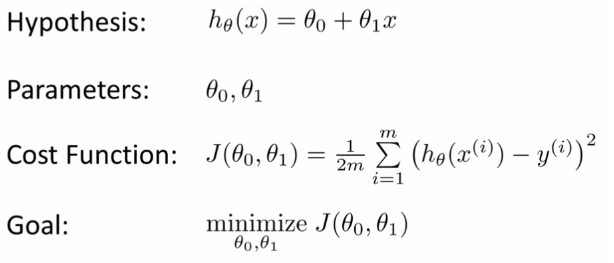

In [13]:
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)    #!! ()**2 not work here
    return np.sum(z) / (2 * len(X))

print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  32.072733877455676


> ### **Gradient descent algorithm**   
> 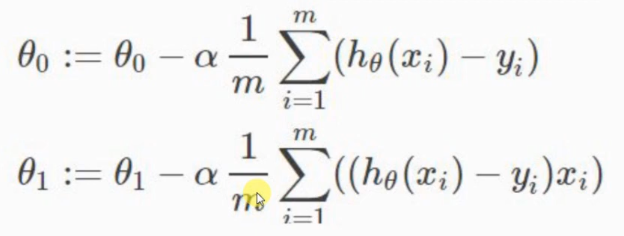

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])   # theta 1*2 > parameters =2 "number of training_data"
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

# initialize variables for learning rate and iterations :
alpha , iters = 0.01, 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
print('g = ' , g)
print('cost =\n' , cost[-10:])
print('computeCost = ' , computeCost(X, y, g))

g =  [[-3.24140214  1.1272942 ]]
cost =
 [4.51724233 4.51709728 4.51695275 4.51680874 4.51666525 4.51652227
 4.51637981 4.51623786 4.51609643 4.5159555 ]
computeCost =  4.515955503078914


## -------- get best fit line --------

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100).round(2)
print('x :\n',x)
print('g :\n',g)
print('**************************************')
bfl = (g[0, 0] + (g[0, 1] * x)).round(2)
print('best fit line :\n',bfl)

x :
 [ 5.03  5.2   5.37  5.55  5.72  5.89  6.07  6.24  6.41  6.59  6.76  6.94
  7.11  7.28  7.46  7.63  7.8   7.98  8.15  8.32  8.5   8.67  8.84  9.02
  9.19  9.36  9.54  9.71  9.88 10.06 10.23 10.41 10.58 10.75 10.93 11.1
 11.27 11.45 11.62 11.79 11.97 12.14 12.31 12.49 12.66 12.83 13.01 13.18
 13.35 13.53 13.7  13.88 14.05 14.22 14.4  14.57 14.74 14.92 15.09 15.26
 15.44 15.61 15.78 15.96 16.13 16.3  16.48 16.65 16.82 17.   17.17 17.35
 17.52 17.69 17.87 18.04 18.21 18.39 18.56 18.73 18.91 19.08 19.25 19.43
 19.6  19.77 19.95 20.12 20.29 20.47 20.64 20.82 20.99 21.16 21.34 21.51
 21.68 21.86 22.03 22.2 ]
g :
 [[-3.24140214  1.1272942 ]]
**************************************
best fit line :
 [ 2.43  2.62  2.81  3.02  3.21  3.4   3.6   3.79  3.98  4.19  4.38  4.58
  4.77  4.97  5.17  5.36  5.55  5.75  5.95  6.14  6.34  6.53  6.72  6.93
  7.12  7.31  7.51  7.7   7.9   8.1   8.29  8.49  8.69  8.88  9.08  9.27
  9.46  9.67  9.86 10.05 10.25 10.44 10.64 10.84 11.03 11.22 11.42 11.62
 11.8

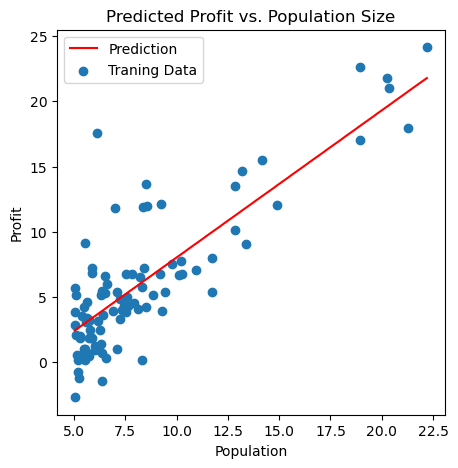

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, bfl, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

plt.show()

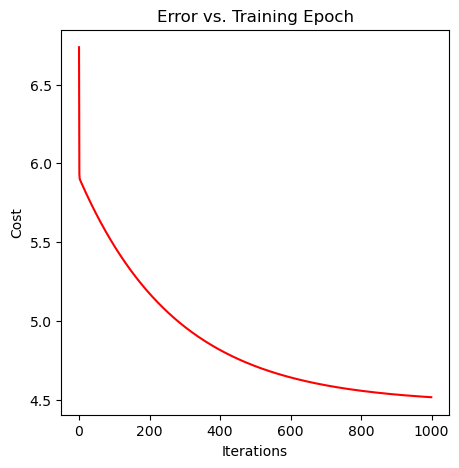

In [21]:
# draw error graph :
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()